In [ ]:
tyimport json
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/sarcasm.json \
    -O /tmp/sarcasm.json

--2020-12-19 23:33:15--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/sarcasm.json
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.139.128, 173.194.210.128, 173.194.212.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.139.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5643545 (5.4M) [application/json]
Saving to: ‘/tmp/sarcasm.json’

/tmp/sarcasm.json   100%[===================>]   5.38M  --.-KB/s    in 0.03s   

2020-12-19 23:33:15 (204 MB/s) - ‘/tmp/sarcasm.json’ saved [5643545/5643545]



In [ ]:
vocab_size = 10000
embedding_dim = 16
max_length = 32
trunc_type = 'post'
padding_type = 'post'
oov_tok = "<OOV>"
training_size = 20000

with open("/tmp/sarcasm.json", 'r') as f:
  datastore = json.load(f)

sentences = []
labels = []

for item in datastore:
  sentences.append(item['headline'])
  labels.append(item['is_sarcastic'])

In [ ]:
training_sentences = sentences[0:training_size]
testing_sentences = sentences[training_size:]
training_labels = labels[0:training_size]
testing_labels = labels[training_size:]

tokinizer = Tokenizer(vocab_size, oov_token=oov_tok)
tokinizer.fit_on_texts(training_sentences)

In [ ]:
word_index = tokinizer.word_index

training_sequences = tokinizer.texts_to_sequences(training_sentences)
training_padded = pad_sequences(training_sequences, maxlen=max_length, 
                                padding=padding_type, truncating=trunc_type)

testing_sequences = tokinizer.texts_to_sequences(testing_sentences)
testing_padded = pad_sequences(testing_sequences, maxlen=max_length, 
                                padding=padding_type, truncating=trunc_type)

In [ ]:
model = keras.Sequential([
  keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
  keras.layers.GlobalAveragePooling1D(),
  keras.layers.Dense(24, activation="relu"),
  keras.layers.Dense(1, activation="sigmoid")
])

model.compile(loss='binary_crossentropy', optimizer='adam', metrics='acc')

In [ ]:
import numpy as np
training_padded = np.array(training_padded)
training_labels = np.array(training_labels)
testing_padded = np.array(testing_padded)
testing_labels = np.array(testing_labels)

In [ ]:
num_epochs = 30

history = model.fit(training_padded, training_labels, epochs=num_epochs,
                    validation_data=(testing_padded, testing_labels))

Epoch 1/30
625/625 [==============================] - 3s 4ms/step - loss: 0.6461 - acc: 0.6110 - val_loss: 0.4046 - val_acc: 0.8234
Epoch 2/30
625/625 [==============================] - 2s 4ms/step - loss: 0.3293 - acc: 0.8703 - val_loss: 0.3449 - val_acc: 0.8535
Epoch 3/30
625/625 [==============================] - 2s 4ms/step - loss: 0.2349 - acc: 0.9098 - val_loss: 0.3420 - val_acc: 0.8545
Epoch 4/30
625/625 [==============================] - 2s 4ms/step - loss: 0.1903 - acc: 0.9302 - val_loss: 0.3691 - val_acc: 0.8514
Epoch 5/30
625/625 [==============================] - 2s 4ms/step - loss: 0.1516 - acc: 0.9468 - val_loss: 0.3948 - val_acc: 0.8469
Epoch 6/30
625/625 [==============================] - 2s 4ms/step - loss: 0.1276 - acc: 0.9565 - val_loss: 0.4332 - val_acc: 0.8404
Epoch 7/30
625/625 [==============================] - 2s 4ms/step - loss: 0.1042 - acc: 0.9666 - val_loss: 0.4807 - val_acc: 0.8351
Epoch 8/30
625/625 [==============================] - 2s 4ms/step - loss: 0.

In [ ]:
import matplotlib.pyplot as plt

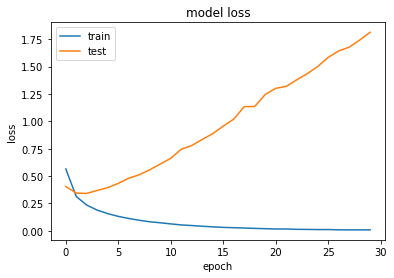

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

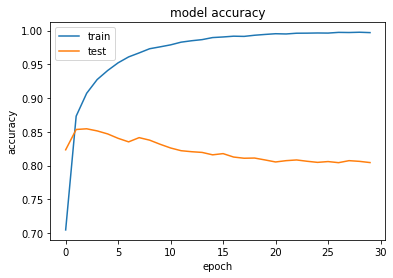

In [ ]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()